# What is Machine Learning?
* Machine Learning is nothing but a **geometry problem**.
* Machine Learning is just a glorified **curve-fitting**.

## Types of Machine Learning
1. **Supervised**
2. **Unsupervised**

### Supervised
Supervised Machine Learning is further divided into two types
1. **Regression:** we want the line/curve to be **close** to the data points.
2. **Classification:** we want the line/curve to **separate** the data points.

## How to make any Machine Learning problems more complicated?
1. **By increasing the number of input features.**
2. **By making the target non-linear.**

But still the moral of the story remains the same, that is, it's still a **Geometry Problem**.

## Some facts about Machine Learning
1. In Machine Learning **all the data is same**.
2. The meaning of the **numbers are irrelevant** to the Machine Learning model.
3. Same model can be used for both Neural Machine Translation and Chatbot.
4. Same model can be used for  both Sentiment Analysis and Spam Detection.

# Linear Regression

## The main concepts

1. **What is the model? How do we build it?** (model architecture)
2. **How do we make the prediction?** (closely related to #1)
3. **How do we fit the model?** (find the slope and intercept)
4. The most complicated step - depends on #1 and #2

## Regression code preparation
1. **build the model**

2. **train the model**

3. **make prediction with the model**

### PyTorch

#### Imports

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### Load Data
- The **model expects the inputs and targets to have two dimensions**, where the first dimension is the batch size and the second dimension is the number of features or outputs.

> #### In ML we want our data to be in the shape of (num_of_samples, num_dimensions)

**Convention:**
* **N** represents `total number of samples (rows)`.
* **D** represents `total number of features (dimension)`.

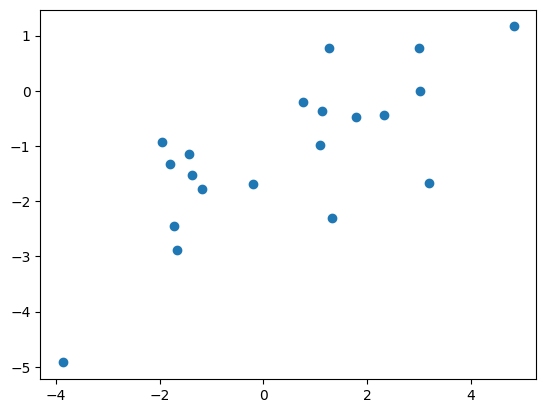

In [2]:
# Generate 20 data points
N = 20
X = np.random.random(N) * 10 - 5
Y = 0.5 * X - 1 + np.random.randn(N) 

# In ML we want our data to be in the shape of (num_of_samples, num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

plt.scatter(X,Y)

#### Build the model
* **`nn.Linear`** class, is a predefined module that implements a linear transformation of the form `y = wx + b`,where
    * **w** is the **weight**
    * **b** is the **bias**

Provided `in_features` and `out_features` as arguments with value `1`, which means that the model has one input feature and one output feature.


In [3]:
# Define the model
model = nn.Linear(in_features=1, out_features=1)

**Loss and Optimizer**

* **criterion** as an instance of the `nn.MSELoss` class, which is a predefined module that computes the `mean squared error (MSE) loss` between the outputs and targets. 
* **optimizer** as an instance of the `optim.SGD` class, which is a predefined module that implements the `stochastic gradient descent (SGD)` algorithm **for updating the model parameters**.

Specified the params argument as `model.parameters()`, which returns an iterator over all the parameters of the model. Also specified the `lr` argument as 0.1, which is the **learning rate** that <u>controls how much the parameters are changed in each update step</u>.

In [4]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(params=model.parameters(), lr=0.1)

> #### In ML we want our data to be in the shape of (num_of_samples, num_dimensions)

In [5]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

#### Train the model 
Create a for loop that iterates over 30 epochs, which are complete passes over the data. In each epoch, the following steps have been performed:

- **Zero the parameter gradients:** `optimizer.zero_grad()` method **sets all the gradients of the parameters to zero**. This is necessary because PyTorch accumulates gradients by default, so you need to clear them before each update step.

- **Forward Pass:** `model(inputs)` method, passes the inputs through the model and returns the outputs. Then calls the `criterion(outputs, targets)` method, which passes the outputs and targets through the loss function and returns the loss value.

- **Backward Pass:** `loss.backward()` **computes** the gradients(slopes) of all the parameters wrt the loss.

The gradients are the slopes of the loss function at each point, and they indicate the `direction` and `magnitude` of the change in the parameters that will reduce the loss. The backward pass uses the chain rule of calculus to compute the gradients efficiently, starting from the output layer and going backwards to the input layer.

- **Optimize:** `optimizer.step()` **updates** all the parameters using their gradients(slopes) and the learning rate.

The learning rate is a hyperparameter that controls how much the parameters are changed in each update. The optimize step uses the gradients to move the parameters slightly in the `opposite direction of the slopes`, which will decrease the loss. The optimize step can use different algorithms to update the parameters, such as `stochastic gradient descent, Adam,` or `RMSprop`.

In [6]:
# Train the model
epochs = 30
losses = []

for epoch in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Keep the loss so we can plot it later
    losses.append(loss.item())

    # Backward Pass and Optimize
    loss.backward() # backpropagation : computes the gradients of all the parameters wrt the loss
    optimizer.step() # update all the parameters using the gradients (slope) and learning rate

    if epoch % 10 == 0:
        print(f"Epoch: {epoch+1}/{epochs} | Loss: {loss.item():.4f}")

Epoch: 1/30 | Loss: 7.2343
Epoch: 11/30 | Loss: 0.8797
Epoch: 21/30 | Loss: 0.8460


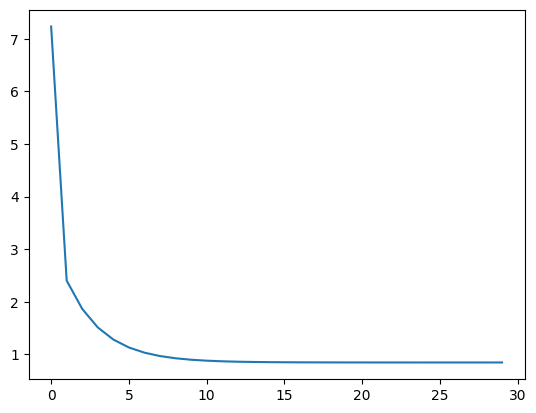

In [7]:
# Plot the loss per iteration
plt.plot(losses)

#### Make predictions with the model
* `with torch.no_grad()` statement, which **disables gradient computation** for all operations inside it. This is useful because we **don’t need gradients when making predictions**. 
* `model(inputs)` method, passes the inputs through the model and returns the predicted outputs.

In [8]:
# Make predictions with the model
with torch.no_grad():
    predicted = model(inputs)
    print("Predicted:", predicted)

Predicted: tensor([[-0.6983],
        [-0.9552],
        [-0.2232],
        [-2.1213],
        [ 0.0871],
        [-2.0940],
        [-0.4800],
        [-2.1538],
        [ 0.1784],
        [ 0.0983],
        [-1.9833],
        [-2.2290],
        [-0.8071],
        [-1.8675],
        [-1.9522],
        [-3.1206],
        [ 0.9409],
        [-0.7856],
        [-1.4038],
        [-0.7251]])


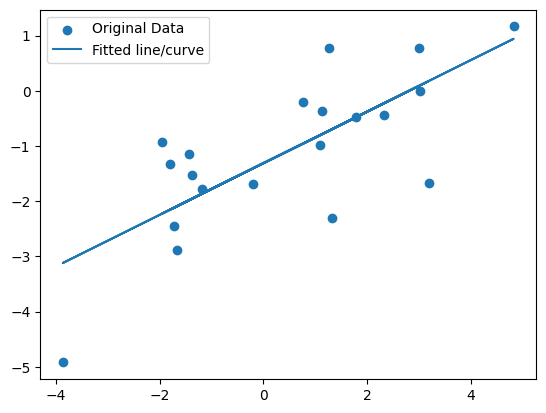

In [9]:
# Plot the line/curve
plt.scatter(X,Y, label="Original Data")
plt.plot(X, predicted, label="Fitted line/curve")
plt.legend()
plt.show()

In [10]:
weight = model.weight.data
bias = model.bias.data

print(f"Weight: {weight} | Bias: {bias}")

Weight: tensor([[0.4677]]) | Bias: tensor([-1.3128])


# Moore Law

## Import Libraries

In [11]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Load Data

In [12]:
data = pd.read_csv("../data/moore.csv", header=None).values
data.shape

(162, 2)

In [13]:
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

print((X.shape, Y.shape))

((162, 1), (162, 1))


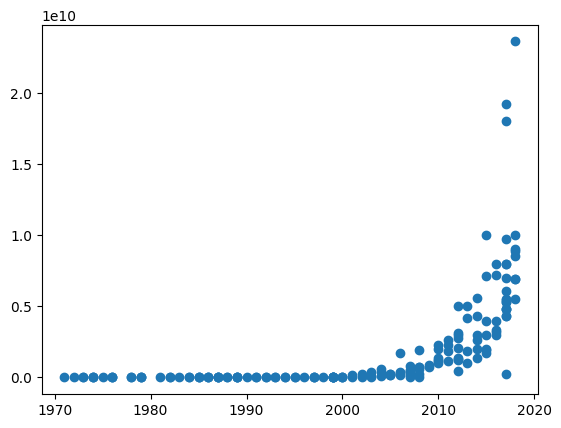

In [14]:
plt.scatter(X,Y)

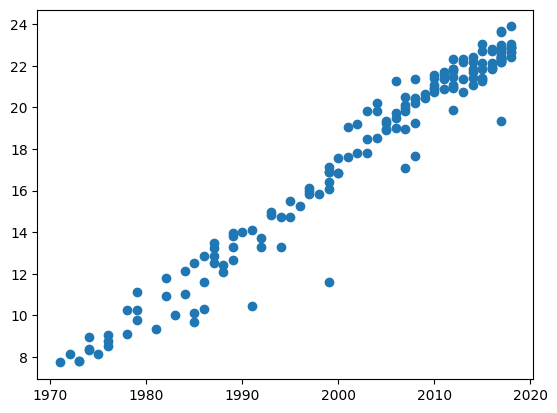

In [15]:
# Since we want Linear Model, let's take the Log
Y = np.log(Y)

plt.scatter(X,Y)

## Preprocess Data

### Standardisation
* mean is 0
* std deviation is 1

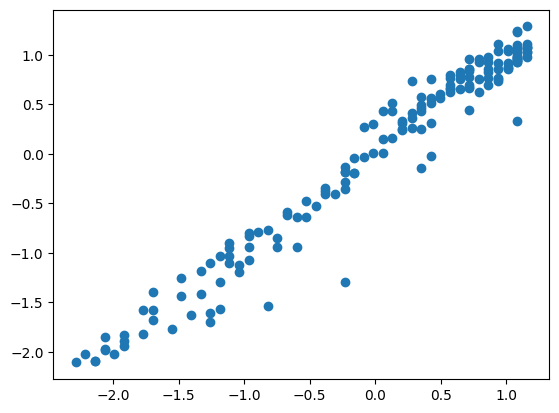

In [16]:
mx = X.mean() # mean of X
sx = X.std()  # std. dev of X

my = Y.mean() # mean of Y
sy = Y.std()  # std. dev of Y

# Standardisation (Scale the data)
X = (X - mx) / (sx)
Y = (Y - my) / (sy)

# Plot them
plt.scatter(X,Y)

## Build Model

In [17]:
model = nn.Linear(in_features=1, out_features=1)

**Momoentum:** is a technique that helps the SGD optimizer to `move faster` and `smoother` **towards the optimal point of the loss function**. It does so by adding a fraction of the previous update to the current one, which creates a momentum effect that pushes the optimizer in the direction of the previous update. This way, the optimizer can overcome small fluctuations or local minima in the loss function and converge faster to the global minimum.

* Momentum can improve the convergence speed and performance of SGD, especially for problems with noisy or sparse gradients.
Momentum can also help SGD escape from **saddle points**, which are points where the loss function has zero gradient(slope) but is not a minimum.

* Momentum can be combined with other techniques such as learning rate decay, weight decay, or Nesterov accelerated gradient to further enhance the optimization process.

* Momentum is one of the most popular and widely used optimization algorithms in deep learning, and many state-of-the-art models are trained using it.

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.7)

## Train Model

Epoch: 0/100 | Loss: 0.1403
Epoch: 20/100 | Loss: 0.0443
Epoch: 40/100 | Loss: 0.0386
Epoch: 60/100 | Loss: 0.0385
Epoch: 80/100 | Loss: 0.0385


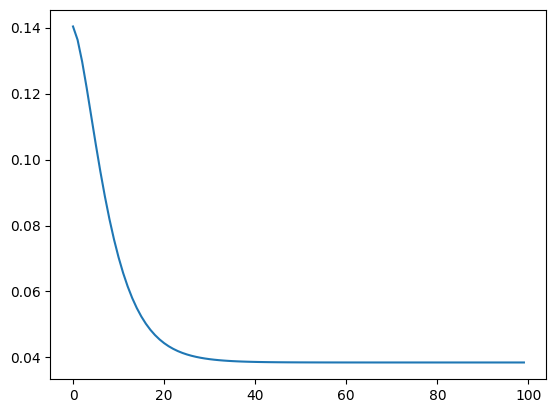

In [19]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

EPOCHS = 100
LOSSES = []
for epoch in range(EPOCHS):
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    LOSSES.append(loss.item())

    loss.backward() # backpropagation : computes the gradients of all the parameters wrt the loss
    optimizer.step() # update all the parameters using the gradients (slope) and learning rate

    if epoch % 20 == 0:
        print(f"Epoch: {epoch}/{EPOCHS} | Loss: {loss:.4f}")

plt.plot(LOSSES)

## Make predictions with the model

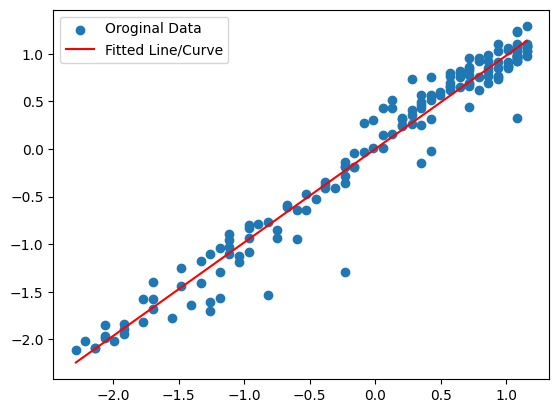

In [20]:
with torch.no_grad():
    predicted = model(inputs)

# plot the graph
plt.scatter(X,Y, label = "Oroginal Data")
plt.plot(X, predicted, "r", label = "Fitted Line/Curve")
plt.legend()
plt.show()

In [21]:
# Get the weights and biases
w = model.weight.data
b = model.bias.data

print(f"Weight: {w} | Bias: {b}")

Weight: tensor([[0.9805]]) | Bias: tensor([5.0326e-05])


# Classification

1. In **Regression:** we want the line/curve to be **close** to the data points.
2. In **Classification:** we want the line/curve to **separate** the data points.

Classification is the process of assigning a category to an input data based on some predefined criteria. It is a type of supervised learning, which means that the model learns from labeled training data and then applies the learned rules to new data. It is widely used in many applications, such as `spam detection, face recognition, sentiment analysis, medical diagnosis,` etc.

- There are different types of classification tasks, such as **binary classification, multi-class classification, multi-label classification,** and **imbalanced classification**. Each type has its own challenges and requires different strategies and algorithms to solve.

- There are many algorithms for classification, such as **logistic regression, k-nearest neighbors, decision trees, support vector machines, neural networks,** etc. Each algorithm has its own advantages and disadvantages, and there is no one-size-fits-all solution. The choice of algorithm depends on the data characteristics, the problem complexity, and the performance metrics.

- Classification accuracy is a common metric to measure the performance of a classification model, but it is not always the best one. For example, accuracy can be misleading when the data is imbalanced or when there are different costs associated with different types of errors. Other metrics, such as **precision, recall, F1-score, ROC curve,** etc., can provide a more comprehensive evaluation of the model performance.

- Classification models can suffer from **overfitting** or **underfitting**, which means that they either memorize the training data too well or fail to capture the underlying patterns of the data. To prevent overfitting or underfitting, various techniques can be used, such as **regularization, cross-validation, feature selection, feature engineering, data augmentation,** etc.

- Classification models can also face ethical and social issues, such as bias, fairness, privacy, accountability, etc. For example, a classification model can produce biased results if the training data is not representative of the target population or if the model discriminates against certain groups of people. To address these issues, various methods can be used, such as **data auditing, fairness metrics, explainability tools,** etc.

# Linear Classification Code Preparation

1. **Load the data**
2. **Preprocess the data**
3. **Build the model**
4. **Train the model**
5. **Evaluate the model**

## Load the data

In [22]:
import sklearn.datasets as datasets

In [23]:
# Load the breast cancer data
data = datasets.load_breast_cancer()

In [24]:
print(f"Total Features: {len(data.feature_names)} | Target Names: {data.target_names}")

Total Features: 30 | Target Names: ['malignant' 'benign']


In [25]:
X = data.data   # input
Y = data.target # target
Y = Y.reshape(-1, 1)

In [26]:
X.shape, Y.shape

((569, 30), (569, 1))

## Preprocess the data

In [27]:
import sklearn.model_selection as model_selection

In [28]:
# Train test split the data before applying any preprocessing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.33)

In [29]:
import sklearn.preprocessing as preprocessing

* The **transform** method applies the scaling parameters learned from the fit method to a given dataset. It does not change the mean and standard deviation of the data, but only scales it according to the previously fitted values. The transform method can be `applied to both` the `training data` and the `test data` (or any new data).

* The **fit_transform** method combines the fit and transform methods in one step. It first calculates the mean and standard deviation of a given dataset, and then scales it accordingly. The fit_transform method can `only be applied` to the `training data`, as it should not use any information from the test data (or any new data) to avoid data leakage.

In [30]:
# Scale the data
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

N = X_train.shape[0]
D = X_train.shape[1]

print(f"No. of Samples: {N} | No. of Dimensions: {D}")

No. of Samples: 381 | No. of Dimensions: 30


## Build the model

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

> ### In ML we want our data to be in the shape of (num_of_samples, num_dimensions)
> **(N,D)**

In [32]:
model = nn.Sequential(
    nn.Linear(in_features=D, out_features=1),
    nn.Sigmoid() # squashes the output to a range between 0 and 1
)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

print(model, "\n")
print(optimizer)

Sequential(
  (0): Linear(in_features=30, out_features=1, bias=True)
  (1): Sigmoid()
) 

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


## Train the model

In [33]:
EPOCHS = 100
LOSSES  = []

X_train = torch.from_numpy(X_train.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))

for epoch in range(EPOCHS):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    
    LOSSES.append(loss.item())

    if epoch % 10 ==  0:
        print(f"Epoch: {epoch}/{EPOCHS} | Loss:{loss}")

    loss.backward() # backpropagation : computes the gradients of all the parameters wrt the loss
    optimizer.step() # update all the parameters using the gradients (slope) and learning rate

Epoch: 0/100 | Loss:0.5711479187011719
Epoch: 10/100 | Loss:0.26859644055366516
Epoch: 20/100 | Loss:0.17463766038417816
Epoch: 30/100 | Loss:0.13593930006027222
Epoch: 40/100 | Loss:0.11690632253885269
Epoch: 50/100 | Loss:0.10574749112129211
Epoch: 60/100 | Loss:0.09815895557403564
Epoch: 70/100 | Loss:0.09250685572624207
Epoch: 80/100 | Loss:0.08803689479827881
Epoch: 90/100 | Loss:0.08436483144760132


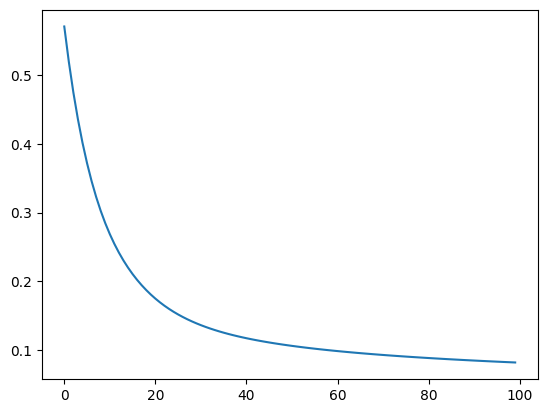

In [34]:
# Plot the losses
plt.plot(LOSSES)

## Evaluate the model

In [35]:
X_test = torch.from_numpy(X_test.astype(np.float32)) # convert the data to Tensor for compatibility
Y_test = torch.from_numpy(Y_test.astype(np.float32)) # convert the data to Tensor for compatibility

with torch.no_grad():
    # evaluation on train data
    train_pred = np.round(model(X_train))
    train_accuracy = np.mean(train_pred.numpy() == Y_train.numpy())

    # evaluation on test data (recommended)
    test_pred = np.round(model(X_test))
    test_accuracy = np.mean(test_pred.numpy() == Y_test.numpy())

    print(f"Train Accuracy: {train_accuracy:.2f} | Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.98 | Test Accuracy: 0.96


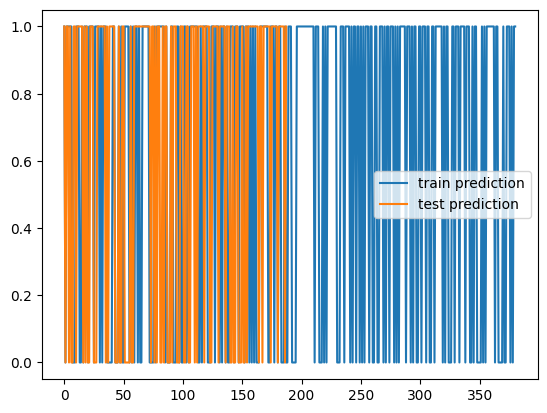

In [36]:
plt.plot(train_pred, label = "train prediction")
plt.plot(test_pred, label = "test prediction")
plt.legend()
plt.show()

In [37]:
weight = model[0].weight.data
bias = model[0].bias.data

print(f"Weight: {weight} | \nBias: {bias}")

Weight: tensor([[-0.5284, -0.3892, -0.2666, -0.5412, -0.3072, -0.0973, -0.2275, -0.3605,
         -0.3631,  0.2784, -0.5817, -0.1386, -0.2151, -0.5691,  0.3332,  0.1302,
          0.2001, -0.1068,  0.3440,  0.4577, -0.5633, -0.5450, -0.3356, -0.2203,
         -0.4208, -0.4552, -0.4879, -0.3393, -0.4577, -0.2314]]) | 
Bias: tensor([0.3623])


# Save and Load the model

## State Dictionary

In [38]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5284, -0.3892, -0.2666, -0.5412, -0.3072, -0.0973, -0.2275, -0.3605,
                       -0.3631,  0.2784, -0.5817, -0.1386, -0.2151, -0.5691,  0.3332,  0.1302,
                        0.2001, -0.1068,  0.3440,  0.4577, -0.5633, -0.5450, -0.3356, -0.2203,
                       -0.4208, -0.4552, -0.4879, -0.3393, -0.4577, -0.2314]])),
             ('0.bias', tensor([0.3623]))])

## Save the model

In [39]:
torch.save(obj=model.state_dict(), f="my_model.pt")

In [40]:
!ls |grep "my"

my_model.pt


## Load the model

**not recommended**

In [41]:
# Recreate the model as it was
model2 = nn.Sequential(
    nn.Linear(in_features=D, out_features=1),
    nn.Sigmoid()
)

# Load the model 
model2.load_state_dict(torch.load("my_model.pt"))

<All keys matched successfully>

In [42]:
# Evaluate the model
with torch.no_grad():
    # evaluation on train data
    train_pred = np.round(model2(X_train))
    train_accuracy = np.mean(train_pred.numpy() == Y_train.numpy())

    # evaluation on test data (recommended)
    test_pred = np.round(model(X_test))
    test_accuracy = np.mean(test_pred.numpy() == Y_test.numpy())

    print(f"Train Accuracy: {train_accuracy:.2f} | Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.98 | Test Accuracy: 0.96


# Feature Importance

It is a way of measuring how much each input feature contributes to the output prediction of the model. It can help us understand how the model works, which features are most relevant, and how to improve the model performance.

* **Weights:** the magnitude of weights tell us how important it is for predicting the output.
* **Gradients:** multi-dimensional equivalent of derivative is the **gradient**.
* **Parameters:** `weights & biases` are parameters, they are learnt by the model  itself.
* **Hyperparameters:** are parameters that are set up by us (Engineers), Learning Rate is a hyperparameter.

# How does a Neural Network model learn ?

A neural network model learns by adjusting its **weights** and **biases** to `minimize the error` between its predicted output and the actual output for a given input. This process is called training, and it involves the following steps:

- **Forward propagation:** The model takes the input data and passes it through the layers of neurons, applying the weights and biases and the `activation functions`, to produce the output.

- **Loss computation:** The model compares the output with the actual output (the label or the target) using a loss function, which measures how well the model performed. The loss function can be different depending on the type of problem, such as classification or regression.

- **Backpropagation:** The model calculates the `gradient of the loss function with respect to each weight and bias`, which indicates `how much each parameter affects the loss`. The gradient tells the model how to change the parameters to reduce the loss.

- **Gradient descent:** The model `updates` the `weights` and `biases` by subtracting a fraction of the gradient, called the **learning rate**, from the current values. This moves the parameters in the direction of the minimum loss.

- The **learning rate** is an important hyperparameter that controls **how fast** or **slow** the model learns. If the learning rate is too high, the model may overshoot the minimum and diverge. If the learning rate is too low, the model may take too long to converge or get stuck in a local minimum.

- The model may not learn well if the data is not properly prepared, such as **normalized, shuffled,** or **balanced**. Normalizing the data helps the model **avoid numerical instability** and scale the features to the same range. Shuffling the data helps the model **avoid learning from the order of the data**. Balancing the data helps the model **avoid learning from a skewed distribution** of classes.

- The model may suffer from overfitting or underfitting, which means that it either learns the training data too well and fails to generalize to new data, or learns the data too poorly and fails to capture the underlying patterns. To prevent overfitting or underfitting, various techniques can be used, such as **regularization, cross-validation, dropout, batch normalization,** etc.

- The model may have different architectures, such as **feedforward, recurrent, convolutional,** etc., depending on the type of data and the task. Each architecture has its own advantages and disadvantages, and there is no one-size-fits-all solution. The choice of architecture depends on the data characteristics, the problem complexity, and the performance metrics.

- The model may not be easily interpretable, which means that it may be difficult to understand how it makes decisions and what features it learns. To improve the interpretability of the model, various methods can be used, such as **feature visualization, network dissection, explainability tools,** etc.

# Train, Validation and Test set

**Training set, validation set,** and **test set** are three different subsets of data that are used to **train, optimize,** and **evaluate** a machine learning model.

- The **training set** is the data that the `model learns from`. It is used to `adjust the parameters` of the model to fit the data and minimize the error. The training set should be large enough and representative enough of the problem domain to enable the model to generalize well to new data.

- The **validation set** is the data that is used to `tune the hyperparameters` of the model, such as the `learning rate, the number of hidden layers, the regularization strength,` etc. The validation set is also used to compare different models and select the best one. The validation set should be independent of the training set and have a `similar distribution of the data`.

- The **test set** is the data that is used to evaluate the `final performance of the model` after it has been trained and optimized. The test set should be independent of both the training set and the validation set and have a `realistic distribution` of the data. The test set should only be used once and not be used to make any changes to the model.

- The purpose of splitting the data into these three sets is to `avoid overfitting` and `underfitting`, which are two common problems in machine learning. **Overfitting** occurs when the model learns the noise or the specific patterns of the training data and fails to generalize to new data. **Underfitting** occurs when the model is too simple or has not learned enough from the training data and fails to capture the underlying patterns of the data.

- The ratio of splitting the data into these three sets depends on the size and the characteristics of the data, as well as the type and the complexity of the model. There is no fixed rule for choosing the ratio, but a common practice is to use `60% of the data for the training set, 20% for the validation set,` and `20% for the test set`. However, if the data is very large, the validation set and the test set can be smaller. If the data is very small, cross-validation can be used to make the most of the data.